**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [409]:
import numpy as np
import matplotlib.pyplot as plt

from line_profiler import LineProfiler
from sklearn.metrics.pairwise import pairwise_distances

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [410]:
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [523]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X = np.float64(X)
        self.classes, self.y = np.unique(y, return_inverse=True)

    def euclidean_metric(self, v):
        return np.sqrt(((self.X - v) ** 2).sum(axis=1))

    '''
    def cnt(self, v):
        z = np.zeros(self.classes.size)
        for i in v:
            z[i] += 1
        return z

    def predict_proba(self, X): # more understandable
        X = np.float64(X)
        # euclidean by default, can use multithreading
        dist = pairwise_distances(X, self.X)
        ind = np.argsort(dist, axis=1)[:, :self.n_neighbors]
        return np.apply_along_axis(self.cnt, 1, self.y[ind]) / self.n_neighbors
    '''

    # '''
    def predict_proba(self, X):  # more quickly
        X = np.float64(X)
        # euclidean by default, can use multithreading
        dist = pairwise_distances(X, self.X)
        ind = np.argsort(dist, axis=1)[:, :self.n_neighbors]
        classes = self.y[ind]
        crange = np.arange(self.classes.shape[0])
        clss = classes.reshape((classes.shape[0], 1, classes.shape[1]))
        crng = crange.reshape((1, crange.shape[0], 1))
        counts = np.sum(clss == crng, axis=2)
        return counts / self.n_neighbors
    # '''

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes[np.argsort(proba, axis=1)[:, -1]]

    def score(self, X, y):
        pred = self.predict(X)
        return 1 - np.count_nonzero(y - pred) / y.shape[0]


**IRIS**

In [492]:
iris = datasets.load_iris()

In [499]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [500]:
clf = KNeighborsClassifier(n_neighbors=17)
my_clf = MyKNeighborsClassifier(n_neighbors=17)

In [501]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 830 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [502]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 128 µs


In [481]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.04 ms


array([2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2])

In [482]:
%time my_clf.predict(X_test)
#profile_print(my_clf.predict, X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.9 ms


array([2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2])

In [483]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.05 ms


array([[ 0.        ,  0.05882353,  0.94117647],
       [ 0.        ,  0.05882353,  0.94117647],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.82352941,  0.17647059],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.76470588,  0.23529412],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.05882353,  0.94117647],
       [ 0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70588235,  0.29411765],
       [ 0.        ,  0.52941176,  0.47058824],
       [ 0.        ,  0.        ,  1.        ]])

In [503]:
#%time my_clf.predict_proba(X_test)
profile_print(my_clf.predict_proba, X_test)

Timer unit: 1e-06 s

Total time: 0.00168 s
File: <ipython-input-498-1b8f7775bb20>
Function: predict_proba at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                               def predict_proba(self, X):
    33         1            9      9.0      0.5          X = np.float64(X)
    34         1         1062   1062.0     63.2          dist = pairwise_distances(X, self.X)
    35         1          462    462.0     27.5          ind = np.argsort(dist, axis=1)[:, :self.n_neighbors]
    36         1           21     21.0      1.2          classes = self.y[ind]
    37         1           12     12.0      0.7          crange = np.arange(self.classes.shape[0])
    38         1            7      7.0      0.4          clss = classes.reshape((classes.shape[0], 1, classes.shape[1]))
    39         1            4      4.0      0.2          crng = crange.reshape((1, crange.shape[0], 1))
    40         1           85     85.0      5.1         

In [485]:
clf.score(X_test, y_test)

1.0

In [486]:
my_clf.score(X_test, y_test)

1.0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


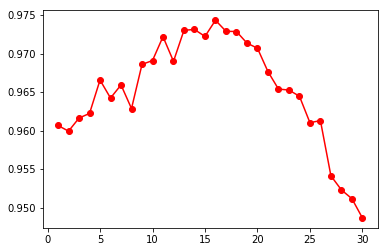

In [442]:
# Задание 3
# 16 - 17
num_n = 30
num_av = 2000
scm = np.zeros(num_n)
sc = np.zeros(num_av)
for n in range(1, num_n + 1):
    print (n)
    for i in range(num_av):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        sc[i] = my_clf.score(X_test, y_test)
    scm[n - 1] = sc.mean()
plt.plot(range(1, num_n + 1), scm, 'ro-')
plt.show()

**MNIST**

In [443]:
mnist = fetch_mldata('MNIST original')

In [504]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [505]:
y_train.shape

(69300,)

In [446]:
clf = KNeighborsClassifier(n_neighbors=5)

In [506]:
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [448]:
%time clf.fit(X_train, y_train)

CPU times: user 47.1 s, sys: 1.55 s, total: 48.7 s
Wall time: 54.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [507]:
%time my_clf.fit(X_train, y_train)

CPU times: user 125 ms, sys: 406 ms, total: 531 ms
Wall time: 620 ms


In [450]:
%time clf.predict(X_test)

CPU times: user 1min 41s, sys: 234 ms, total: 1min 41s
Wall time: 1min 51s


array([ 1.,  1.,  5.,  6.,  4.,  8.,  4.,  9.,  8.,  4.,  3.,  2.,  9.,
        5.,  9.,  7.,  0.,  7.,  9.,  5.,  1.,  3.,  0.,  8.,  3.,  7.,
        4.,  7.,  0.,  6.,  6.,  8.,  7.,  6.,  3.,  9.,  4.,  7.,  0.,
        7.,  3.,  0.,  5.,  2.,  3.,  1.,  9.,  1.,  9.,  3.,  0.,  1.,
        1.,  8.,  0.,  9.,  9.,  8.,  5.,  0.,  6.,  2.,  7.,  8.,  8.,
        6.,  7.,  2.,  7.,  2.,  3.,  9.,  3.,  0.,  4.,  5.,  9.,  8.,
        9.,  3.,  4.,  5.,  2.,  2.,  9.,  7.,  2.,  7.,  6.,  6.,  5.,
        9.,  6.,  1.,  9.,  8.,  1.,  6.,  2.,  1.,  4.,  7.,  3.,  3.,
        9.,  0.,  4.,  5.,  9.,  4.,  1.,  5.,  4.,  8.,  0.,  6.,  8.,
        3.,  0.,  8.,  0.,  6.,  9.,  9.,  5.,  9.,  6.,  8.,  2.,  8.,
        2.,  1.,  3.,  8.,  4.,  3.,  5.,  7.,  4.,  0.,  2.,  2.,  9.,
        0.,  0.,  6.,  2.,  4.,  0.,  8.,  4.,  6.,  3.,  1.,  5.,  7.,
        5.,  5.,  3.,  9.,  3.,  0.,  8.,  5.,  1.,  9.,  5.,  8.,  7.,
        4.,  4.,  9.,  2.,  9.,  7.,  8.,  7.,  8.,  3.,  9.,  7

In [451]:
%time my_clf.predict(X_test)

CPU times: user 9.33 s, sys: 859 ms, total: 10.2 s
Wall time: 11 s


array([ 1.,  1.,  5.,  6.,  4.,  8.,  4.,  9.,  8.,  4.,  3.,  2.,  9.,
        5.,  9.,  7.,  0.,  7.,  9.,  5.,  1.,  3.,  0.,  8.,  3.,  7.,
        4.,  7.,  0.,  6.,  6.,  8.,  7.,  6.,  3.,  9.,  4.,  7.,  0.,
        7.,  3.,  0.,  5.,  2.,  3.,  1.,  9.,  1.,  9.,  3.,  0.,  1.,
        1.,  8.,  0.,  9.,  9.,  8.,  5.,  0.,  6.,  2.,  7.,  8.,  8.,
        6.,  7.,  2.,  7.,  2.,  3.,  9.,  3.,  0.,  4.,  5.,  9.,  8.,
        9.,  3.,  4.,  5.,  2.,  2.,  9.,  7.,  2.,  7.,  6.,  6.,  5.,
        9.,  6.,  1.,  9.,  8.,  1.,  6.,  2.,  1.,  4.,  7.,  3.,  3.,
        9.,  0.,  4.,  5.,  9.,  4.,  3.,  5.,  4.,  8.,  0.,  6.,  8.,
        3.,  0.,  8.,  0.,  6.,  9.,  9.,  7.,  9.,  6.,  8.,  2.,  8.,
        2.,  1.,  3.,  8.,  4.,  3.,  5.,  7.,  4.,  0.,  2.,  2.,  9.,
        0.,  0.,  6.,  2.,  4.,  0.,  8.,  4.,  6.,  3.,  1.,  5.,  7.,
        5.,  5.,  3.,  9.,  3.,  0.,  8.,  5.,  1.,  9.,  5.,  8.,  7.,
        4.,  4.,  9.,  2.,  9.,  7.,  8.,  7.,  8.,  3.,  9.,  7

In [452]:
%time clf.predict_proba(X_test)

CPU times: user 1min 40s, sys: 250 ms, total: 1min 40s
Wall time: 1min 51s


array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

In [508]:
#%time my_clf.predict_proba(X_test)
%time profile_print(my_clf.predict_proba, X_test)

Timer unit: 1e-06 s

Total time: 9.78467 s
File: <ipython-input-498-1b8f7775bb20>
Function: predict_proba at line 32

Line #      Hits         Time  Per Hit   % Time  Line Contents
    32                                               def predict_proba(self, X):
    33         1         1492   1492.0      0.0          X = np.float64(X)
    34         1      2772950 2772950.0     28.3          dist = pairwise_distances(X, self.X)
    35         1      7009591 7009591.0     71.6          ind = np.argsort(dist, axis=1)[:, :self.n_neighbors]
    36         1          165    165.0      0.0          classes = self.y[ind]
    37         1           13     13.0      0.0          crange = np.arange(self.classes.shape[0])
    38         1           20     20.0      0.0          clss = classes.reshape((classes.shape[0], 1, classes.shape[1]))
    39         1            2      2.0      0.0          crng = crange.reshape((1, crange.shape[0], 1))
    40         1          405    405.0      0.0       

In [454]:
clf.score(X_test, y_test)

0.97285714285714286

In [455]:
my_clf.score(X_test, y_test)

0.9757142857142858

1
1   0
1   1
1   2
1   3
1   4
1   5
1   6
1   7
1   8
1   9
1   10
1   11
1   12
1   13
1   14
1   15
1   16
1   17
1   18
1   19
2
2   0
2   1
2   2
2   3
2   4
2   5
2   6
2   7
2   8
2   9
2   10
2   11
2   12
2   13
2   14
2   15
2   16
2   17
2   18
2   19
3
3   0
3   1
3   2
3   3
3   4
3   5
3   6
3   7
3   8
3   9
3   10
3   11
3   12
3   13
3   14
3   15
3   16
3   17
3   18
3   19
4
4   0
4   1
4   2
4   3
4   4
4   5
4   6
4   7
4   8
4   9
4   10
4   11
4   12
4   13
4   14
4   15
4   16
4   17
4   18
4   19
5
5   0
5   1
5   2
5   3
5   4
5   5
5   6
5   7
5   8
5   9
5   10
5   11
5   12
5   13
5   14
5   15
5   16
5   17
5   18
5   19
6
6   0
6   1
6   2
6   3
6   4
6   5
6   6
6   7
6   8
6   9
6   10
6   11
6   12
6   13
6   14
6   15
6   16
6   17
6   18
6   19
7
7   0
7   1
7   2
7   3
7   4
7   5
7   6
7   7
7   8
7   9
7   10
7   11
7   12
7   13
7   14
7   15
7   16
7   17
7   18
7   19
8
8   0
8   1
8   2
8   3
8   4
8   5
8   6
8   7
8   8
8   9
8   10
8   11


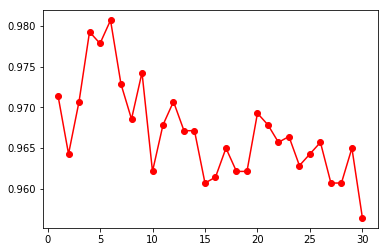

In [393]:
# n_neighbors = 5
num_n = 30
num_av = 20
scm = np.zeros(num_n)
sc = np.zeros(num_av)
for n in range(1, num_n + 1):
    print (n)
    for i in range(num_av):
        print (n, ' ', i)
        X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.001, stratify=mnist.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        sc[i] = my_clf.score(X_test, y_test)
    scm[n - 1] = sc.mean()
plt.plot(range(1, num_n + 1), scm, 'ro-')
plt.show()

In [524]:
print (1)

1


Задание 5

In [ ]:
# seaborn - красивые и простые в написании графики и визуализация
# matplotlib - более сложные в написании и более функциональные, чем seaborn
# train_test_split - разбиение данных на обучающую и тестовую часть
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - конвейерный классификатор
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормировка
# ClassifierMixin - общий Mixin для классификаторов, в нем реализован score
# NeighborsBase - базовый класс Knn
# KNeighborsMixin - Mixin содержащий метод поиска ближайших соседей
# SupervisedIntegerMixin - Mixin с функцией fit для установления соответствия
#                          между данными и целевыми переменными